<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
local_csv = '../data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [9]:
# A:
NHL = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [12]:
# A:
NHL.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [14]:
NHL.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


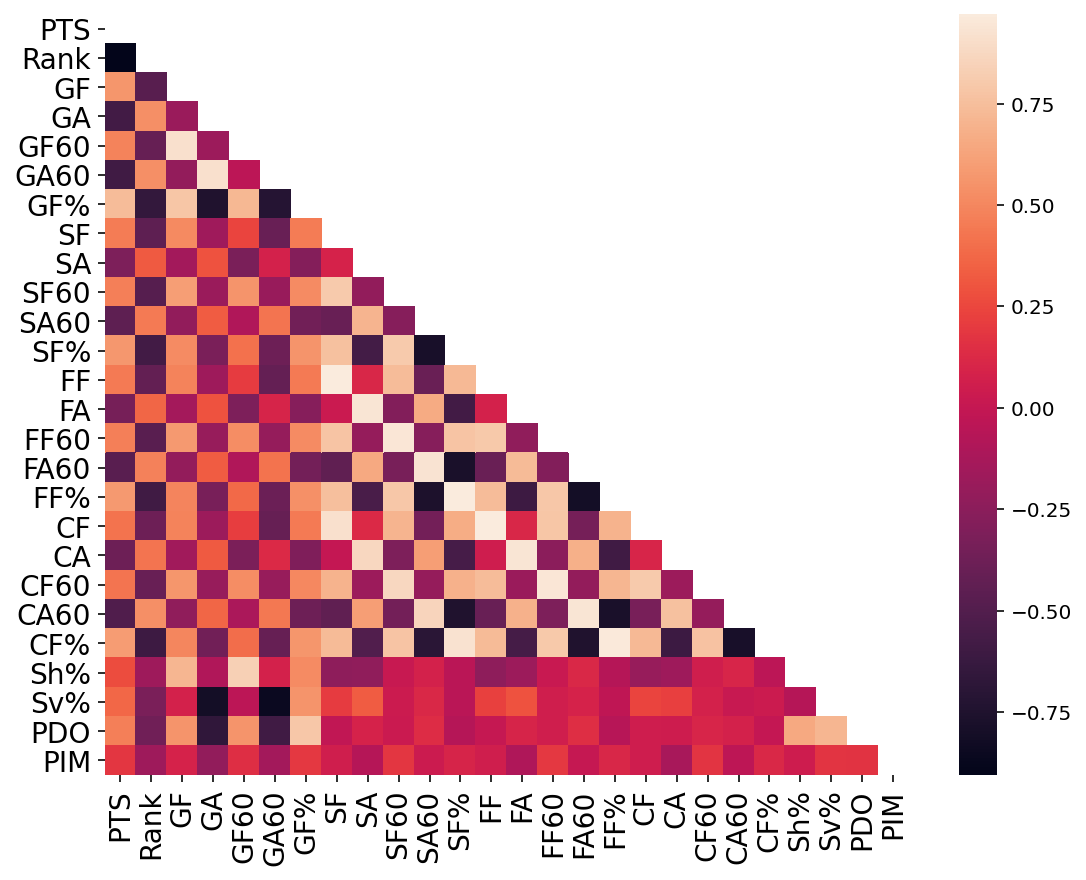

In [23]:
correlation = NHL.corr()

#from solutions: 
corr = NHL.corr()

fig, ax = plt.subplots(figsize=(9,7))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [20]:
# A:

y = NHL.Rank

In [21]:
NHL.Rank.unique()

array([1, 2, 3])

### 4. What is the baseline accuracy?

In [34]:
# A:
NHL.Rank.value_counts('mean')
#baseline accuracy is 34.4%


3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [39]:
# A:
#variables: GA, GF%, CF%, PDO

predictor_variables = ['GA','GF%','CF%','PDO']
X = NHL[predictor_variables]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [49]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

knnn = KNeighborsClassifier(n_neighbors=1)
knnn.fit (X,y)

KNeighborsClassifier(n_neighbors=1)

In [55]:
from sklearn import metrics

total_y_pred_class = knnn.predict(X)

print((metrics.accuracy_score(y, total_y_pred_class)))

1.0


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [47]:
# A:
from sklearn import metrics

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.5652173913043478


### 8. Create an 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [81]:
# A:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = .2)


knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X2_train, y2_train)

# A:
from sklearn import metrics

y2_pred_class = knn2.predict(X2_test)
print((metrics.accuracy_score(y2_test, y2_pred_class)))

0.6111111111111112


### 9. Fit the KNN at values of K from 1 to the max number of rows in 5 fold cross validation and plot the mean cross-validated accuracy.

- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [87]:
# A:

knn50 = KNeighborsClassifier(n_neighbors=1)
knn50.fit(X2_train, y2_train)

# A:
from sklearn import metrics

y50_pred_class = knn50.predict(X2_test)
print((metrics.accuracy_score(y2_test, y2_pred_class)))



def get_accuracy_for_every_k(train_df,test_df, max_num):
    
    results = []
    for i in range(1, max_num+1):
        knn = KNeighborsClassifier(n_neighbors=i)
        scores = cross_validate(knn, train_df, test_df ,cv=5, return_train_score=False)
        # take mean of scores
        results.append(np.mean(scores['test_score']))
    return results

0.6111111111111112


### 10. Standardize the predictor matrix and then repeat the steps in the previous question
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

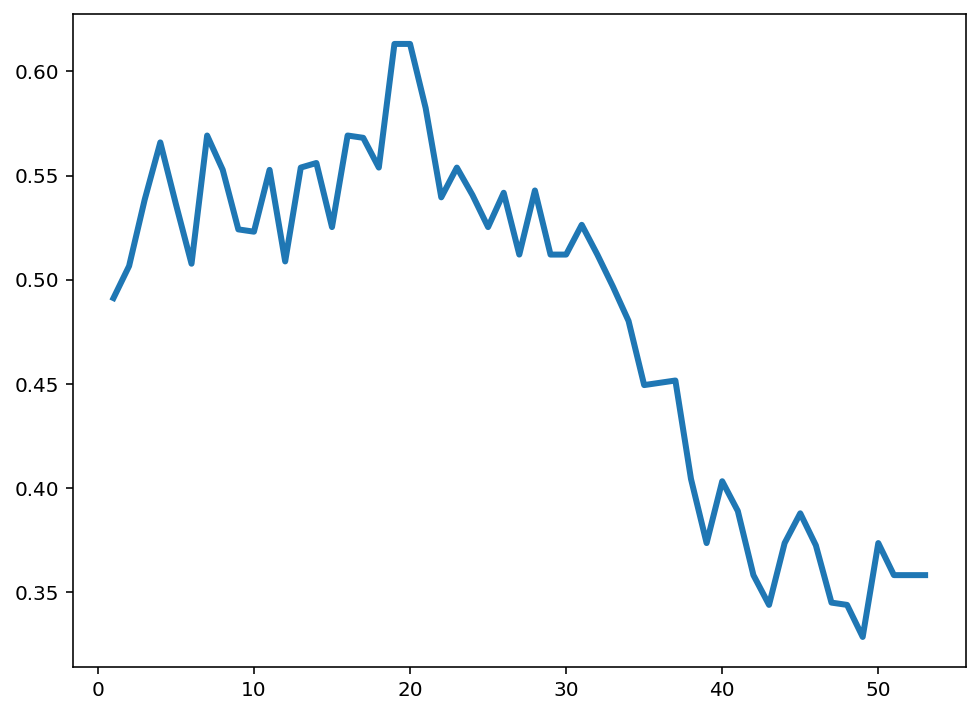

In [91]:
# A:

# max_neighbors in 5 fold cv is 80% of your data, rounded down
max_neighbors = int(np.floor(X_train.shape[0] - X_train.shape[0]/5.))
test_acc = get_accuracy_for_every_k(train_df=X_train, test_df=y_train, max_num=max_neighbors)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, max_neighbors+1)), test_acc, lw=3.)
plt.show()

### 11. Fit a model on your best K and score it on your test data